# Introduction

## Data Scientist hiring challenge hosted in HackerEarth website

## This machine learning challenge is about predicting the loan sanction amount from the customer's basic account transaction details and requested loan amount.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Load necessary packages

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics as st
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

### Load train and test dataset

In [ ]:
train=pd.read_csv("/content/gdrive/MyDrive/cipla-data-scientist-hiring-challenge/train.csv")
test=pd.read_csv("/content/gdrive/MyDrive/cipla-data-scientist-hiring-challenge/test.csv")

### Structure of the train and test dataset

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

#### The above information shows that there are 24 columns and 30000 data entries

#### In that 24 columns,13 columns are mixed data typess

#### 11 numerical columns

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  20000 non-null  object 
 1   Name                         20000 non-null  object 
 2   Gender                       19969 non-null  object 
 3   Age                          20000 non-null  int64  
 4   Income (USD)                 19250 non-null  float64
 5   Income Stability             19187 non-null  object 
 6   Profession                   20000 non-null  object 
 7   Type of Employment           15311 non-null  object 
 8   Location                     20000 non-null  object 
 9   Loan Amount Request (USD)    20000 non-null  float64
 10  Current Loan Expenses (USD)  19917 non-null  float64
 11  Expense Type 1               20000 non-null  object 
 12  Expense Type 2               20000 non-null  object 
 13  Dependents      

#### The above information shows that there are 23 columns and 20000 data entries

### Let's see the summaries of numerical column

In [ ]:
train.describe(exclude='object')

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,30000.000000,2.515000e+04,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,501.934700,2.631119e+03,2.460067,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,288.158086,1.132268e+04,1.118562,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,251.000000,1.650450e+03,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,504.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,751.000000,3.091407e+03,3.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


In [ ]:
test.describe(exclude='object')

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type
count,20000.000000,19250.000000,20000.000000,19917.000000,18858.000000,19257.000000,20000.000000,20000.000000,19108.000000,20000.00000
mean,39.940500,2536.995394,88859.076706,408.462359,2.251246,738.821538,0.189500,501.024500,2534.102003,2.47190
std,16.097618,1415.908803,60007.333673,215.846532,0.953153,72.406504,0.391915,287.537722,1408.509255,1.12551
min,18.000000,368.590000,6185.480000,41.370000,1.000000,580.040000,0.000000,1.000000,368.590000,1.00000
25%,25.000000,1659.722500,40889.030000,250.890000,2.000000,680.300000,0.000000,252.000000,1658.397500,1.00000
50%,40.000000,2224.590000,74565.990000,374.000000,2.000000,739.300000,0.000000,501.000000,2220.605000,2.00000
75%,55.000000,3082.925000,120068.852500,519.570000,3.000000,797.440000,0.000000,748.000000,3082.250000,3.00000
max,65.000000,30427.680000,576335.680000,3305.970000,13.000000,893.830000,1.000000,999.000000,30427.680000,4.00000


### Let's see missing value counts by column-wise

In [ ]:
train.isnull().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [ ]:
test.isnull().sum()

Customer ID                       0
Name                              0
Gender                           31
Age                               0
Income (USD)                    750
Income Stability                813
Profession                        0
Type of Employment             4689
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)      83
Expense Type 1                    0
Expense Type 2                    0
Dependents                     1142
Credit Score                    743
No. of Defaults                   0
Has Active Credit Card         1076
Property ID                       0
Property Age                    892
Property Type                     0
Property Location               160
Co-Applicant                      0
Property Price                    0
dtype: int64

#### In both train and test dataset,Type of Employment column has more number of missing values.

### Let's see the glimpse of train and test dataset.


In [ ]:
train.head(3)

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43


In [ ]:
test.head(3)

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,396.72,N,N,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,463.76,Y,Y,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,493.15,N,Y,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24


### Exploratory Data Analysis

#### Let's see the target column(Loan Sanction Amount (USD)) distribution

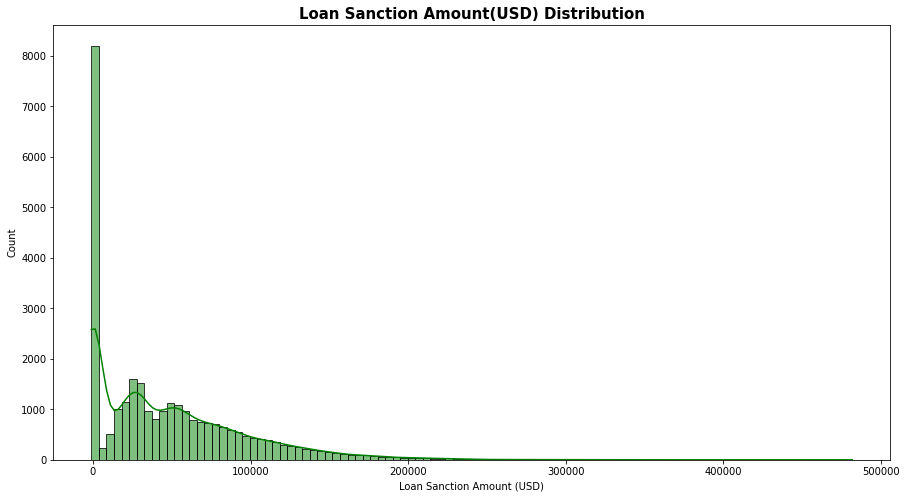

In [ ]:
_=plt.figure(figsize=(15,8))
target_hist=sns.histplot(train['Loan Sanction Amount (USD)'],kde=True,bins='auto',color='green')
_= target_hist.set_title("Loan Sanction Amount(USD) Distribution",fontdict={'fontsize':15,'fontweight':'bold'})

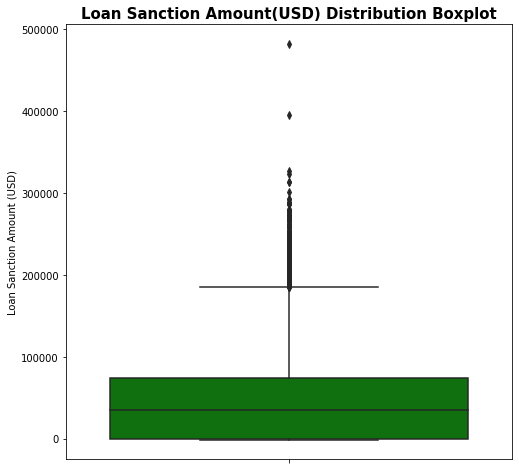

In [ ]:
plt.figure(figsize=(8,8))
target_box=sns.boxplot(y=train['Loan Sanction Amount (USD)'],color='green',)
_= target_box.set_title("Loan Sanction Amount(USD) Distribution Boxplot",fontdict={'fontsize':15,'fontweight':'bold'})

In [ ]:
train['Loan Sanction Amount (USD)'].describe()

count     29660.000000
mean      47649.342208
std       48221.146686
min        -999.000000
25%           0.000000
50%       35209.395000
75%       74261.250000
max      481907.320000
Name: Loan Sanction Amount (USD), dtype: float64

#### The above histogram and bocplot explains that the target column's distribution is **right skewed**.

#### The **average** loan sanction amount is **47649 USD**

#### There are **Negative** loan sanction amount values 

#### There are more number of **outlier** points above the third quartile.

#### Let's see is there any duplication in customer_id column.

In [ ]:
train.pivot_table(index = ['Customer ID'], aggfunc ='size')

Customer ID
C-0        1
C-1        1
C-100      1
C-10000    1
C-10002    1
          ..
C-9992     1
C-9994     1
C-9996     1
C-9997     1
C-9999     1
Length: 30000, dtype: int64

#### There is no duplication in customer id column

#### Let's see gender-wise popular customer names

In [ ]:
from wordcloud import WordCloud

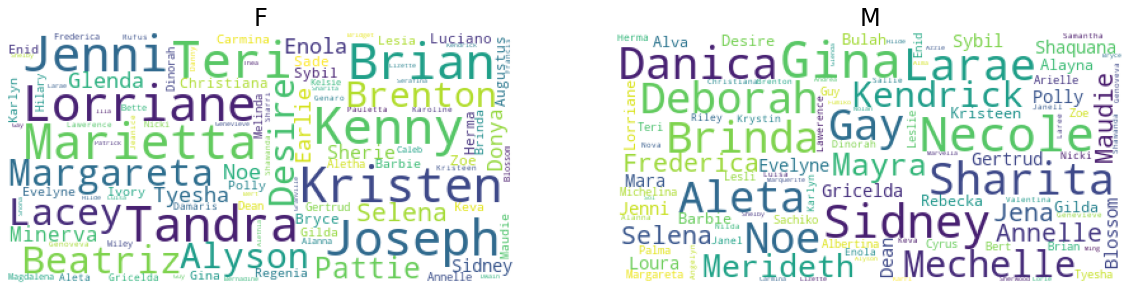

In [ ]:
fig=plt.figure(figsize=(20, 10))
for d,x in enumerate(train.dropna()['Gender'].unique()):
  plt.subplot(1,2,d+1)
  wc = WordCloud(background_color="white", max_words=100,
                   max_font_size=40, random_state=42).generate(train[train['Gender']==x]['Name'].to_string())  
  plt.imshow(wc)
  plt.title(x,fontsize='24',fontweight='20')
  plt.axis("off")

#### The above word cloud explains that the names are not properly classified under gender.

### Let's see is there any difference in loan sanction amount by gender.

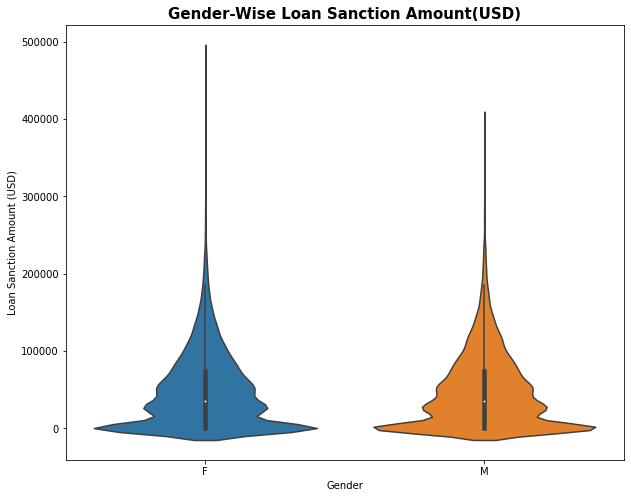

In [ ]:
plt.figure(figsize=(10,8))
gen_loan=sns.violinplot(train['Gender'],train['Loan Sanction Amount (USD)'])
_=gen_loan.set_title("Gender-Wise Loan Sanction Amount(USD)",fontdict={'fontsize':15,'fontweight':'bold'})

In [ ]:
train.groupby('Gender')['Loan Sanction Amount (USD)'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,14718.0,47763.331145,48228.995233,-999.0,0.0,35630.375,74132.7175,481907.32
M,14890.0,47530.983565,48214.494154,-999.0,0.0,34711.795,74297.2900,395368.74


#### The above violin plot shows that there is notable difference of average loan sanctiom amount in both gender

#### The maximum amount range loans are sanctioned to female customers

### Let's see customer's age distribution

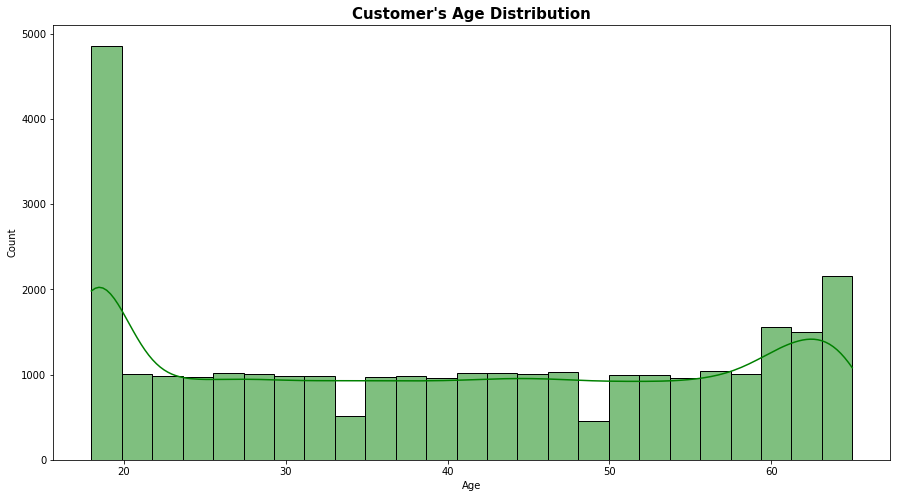

In [ ]:
_=plt.figure(figsize=(15,8))
age_hist=sns.histplot(train['Age'],kde=True,bins='auto',color='green')
_= age_hist.set_title("Customer's Age Distribution",fontdict={'fontsize':15,'fontweight':'bold'})

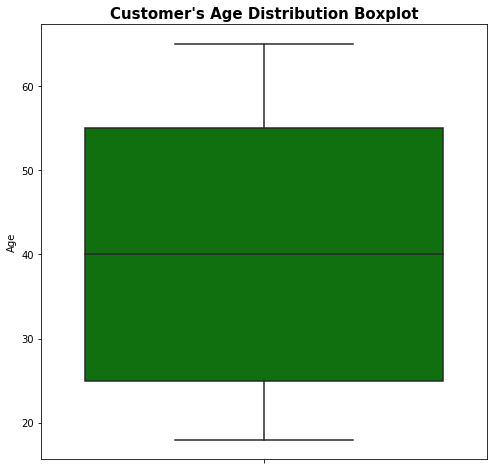

In [ ]:
plt.figure(figsize=(8,8))
age_box=sns.boxplot(y=train['Age'],color='green',)
_= age_box.set_title("Customer's Age Distribution Boxplot",fontdict={'fontsize':15,'fontweight':'bold'})

In [ ]:
train['Age'].describe()

count    30000.000000
mean        40.092300
std         16.045129
min         18.000000
25%         25.000000
50%         40.000000
75%         55.000000
max         65.000000
Name: Age, dtype: float64


#### The above histogram explains that the age feature distribution is normal and boxplot explains there is no outliers.
#### The average age of customer is 40
#### Most home loans are applied by customers who are under the age of 20.

#### Let's see is there any relation between customer age and loan sanction amount

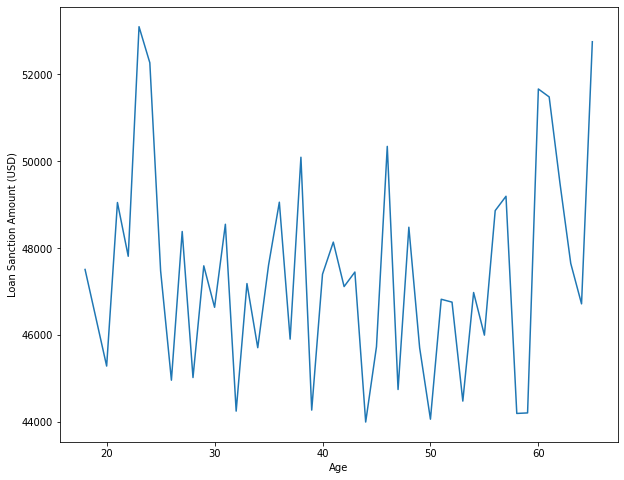

In [ ]:
plt.figure(figsize=(10,8))
_=sns.lineplot(train['Age'],train['Loan Sanction Amount (USD)'],markers=True,ci=None)

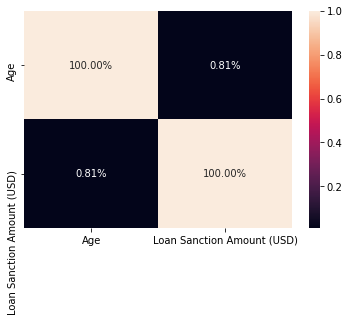

In [ ]:
_=sns.heatmap(train[['Age','Loan Sanction Amount (USD)']].corr(),annot=True,fmt=".2%")

#### The above line plot and heatmap explains that the age and loan sanction amount features do not have any correlation 

#### The correlation value is 0.81% so we can't conclude it as a positive correlation.

### Let' see Customer's income distribution

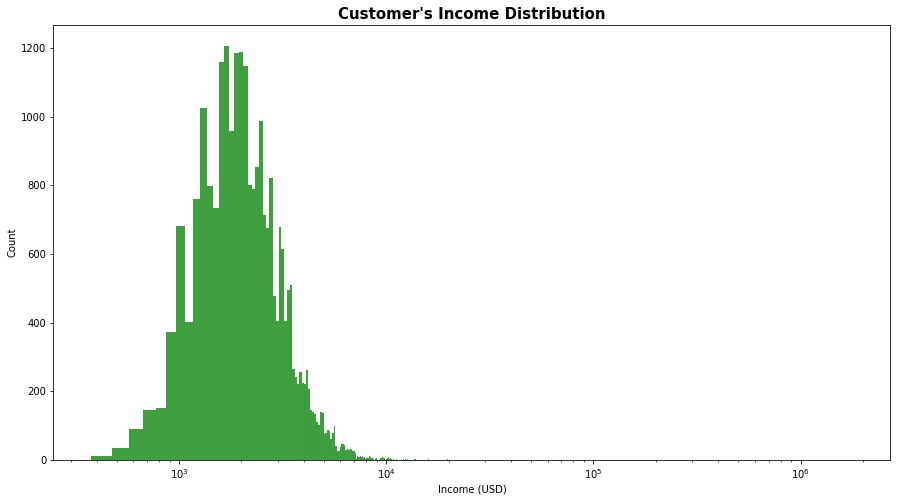

In [ ]:
_=plt.figure(figsize=(15,8))
income_hist=sns.histplot(train['Income (USD)'],bins='auto',color='green')
income_hist.set_xscale('log')
_= income_hist.set_title("Customer's Income Distribution",fontdict={'fontsize':15,'fontweight':'bold'})

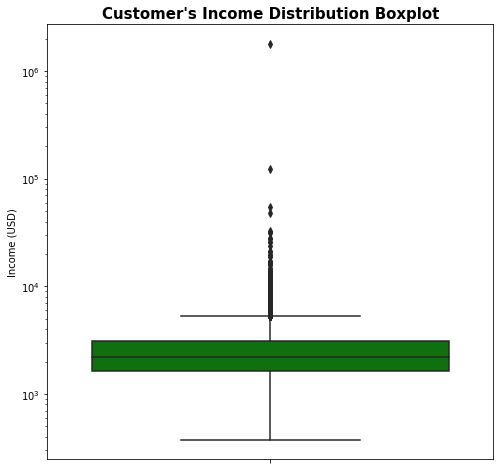

In [ ]:
plt.figure(figsize=(8,8))
income_box=sns.boxplot(y=train['Income (USD)'],color='green',)
income_box.set_yscale('log')
_= income_box.set_title("Customer's Income Distribution Boxplot",fontdict={'fontsize':15,'fontweight':'bold'})

In [ ]:
train['Income (USD)'].describe()

count    2.542400e+04
mean     2.630574e+03
std      1.126272e+04
min      3.777000e+02
25%      1.650457e+03
50%      2.222435e+03
75%      3.090593e+03
max      1.777460e+06
Name: Income (USD), dtype: float64

#### The above histogram and boxplot explains that the income feature distribution is normal and boxplot explains that there are more outliers above the third quartile.

#### The **average** customer income is **2630 USD**.

#### Let's see  there any relation between customer income and loan sanction amount

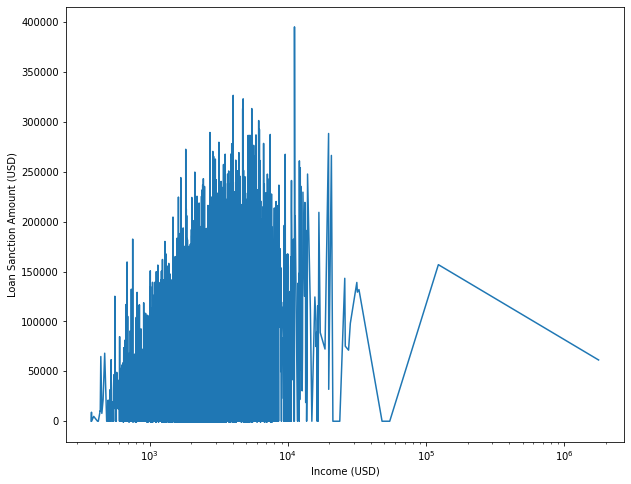

In [ ]:
plt.figure(figsize=(10,8))
income_loan=sns.lineplot(train['Income (USD)'],train['Loan Sanction Amount (USD)'],markers=True,ci=None)
income_loan.set_xscale('log')

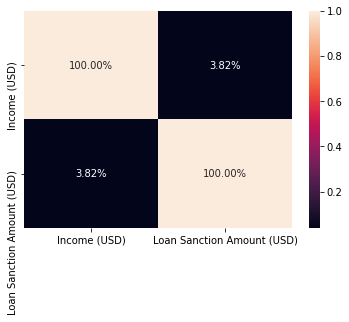

In [ ]:
_=sns.heatmap(train[['Income (USD)','Loan Sanction Amount (USD)']].corr(),annot=True,fmt=".2%")

#### The above line plot and heatmap explains that the income and loan sanction amount features do not have any correlation.

#### The correlation value is under 5%

### Let's see customer's income stability category and loan sanction amount.

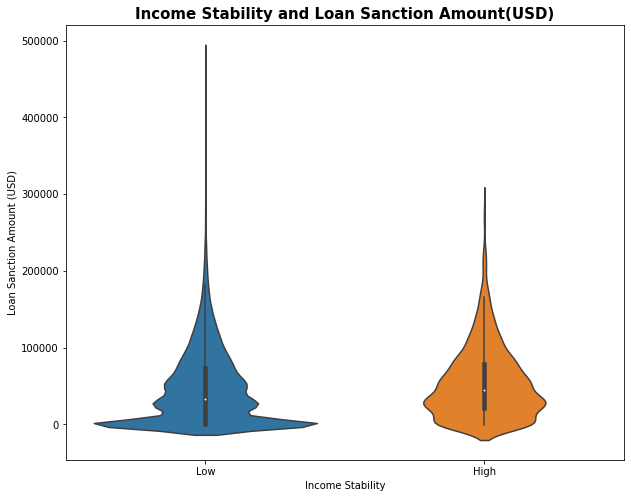

In [ ]:
plt.figure(figsize=(10,8))
instab_loan=sns.violinplot(train['Income Stability'],train['Loan Sanction Amount (USD)'])
_=instab_loan.set_title("Income Stability and Loan Sanction Amount(USD)",fontdict={'fontsize':15,'fontweight':'bold'})

In [ ]:
train.groupby('Income Stability')['Loan Sanction Amount (USD)'].describe()

,count,mean,std,min,25%,50%,75%,max
Income Stability,,,,,,,,
High,2544.0,54066.256399,46767.191954,-999.0,21182.7625,44542.195,79227.8325,289506.99
Low,25458.0,46426.462856,48391.304059,-999.0,0.0000,33417.770,73102.0800,481907.32


#### The above violin plot explains that there is a high difference in the average home loan sanction amount of income stability category. 

#### The low stability income category customers are likely to get more loan sanction amount than high stable income customers.

### Let's see customer's profession types and loan sanction amount


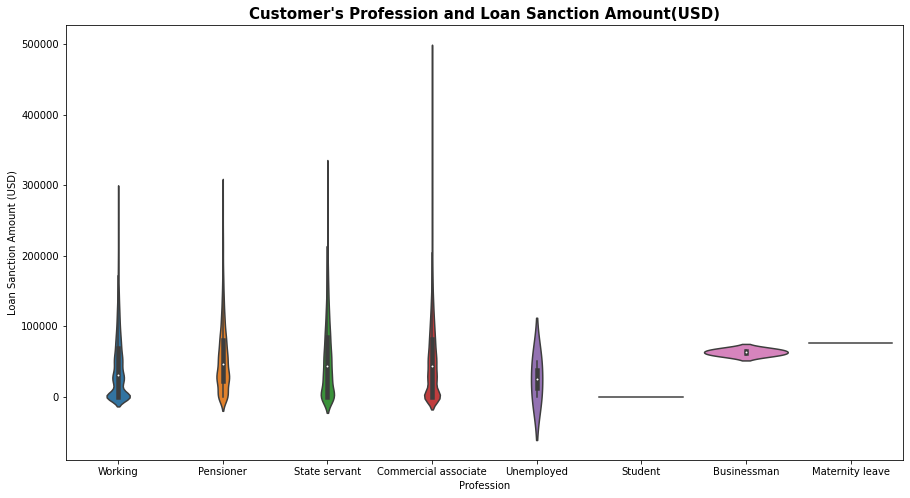

In [ ]:
plt.figure(figsize=(15,8))
prof_loan=sns.violinplot(train['Profession'],train['Loan Sanction Amount (USD)'])
_=prof_loan.set_title("Customer's Profession and Loan Sanction Amount(USD)",fontdict={'fontsize':15,'fontweight':'bold'})

In [ ]:
train.groupby('Profession')['Loan Sanction Amount (USD)'].describe()

,count,mean,std,min,25%,50%,75%,max
Profession,,,,,,,,
Businessman,2.0,62941.285000,4782.523786,59559.53,61250.4075,62941.285,64632.1625,66323.04
Commercial associate,7863.0,52507.008598,52013.651764,-999.00,0.0000,42654.010,81455.3450,481907.32
Maternity leave,1.0,76277.290000,NaN,76277.29,76277.2900,76277.290,76277.2900,76277.29
Pensioner,2718.0,54825.847763,46796.146415,-999.00,22021.9300,46022.280,79735.2925,289506.99
State servant,2334.0,53616.559006,52146.467251,-999.00,0.0000,43078.700,85057.6375,313452.68
Student,1.0,0.000000,NaN,0.00,0.0000,0.000,0.0000,0.00
Unemployed,2.0,25056.790000,35435.652248,0.00,12528.3950,25056.790,37585.1850,50113.58
Working,16739.0,43372.179038,45519.005837,-999.00,0.0000,30907.150,68358.3900,286728.12


#### The above viloin plot explains that there is a difference between customer's profession and the average loan sanction amount.

#### No home loans for the customers who are students.

#### If the customer's profession is commercial associates they will get the highest home loan amount when compared to other professions.

#### Let's see customer's employment types and loan sanction amount

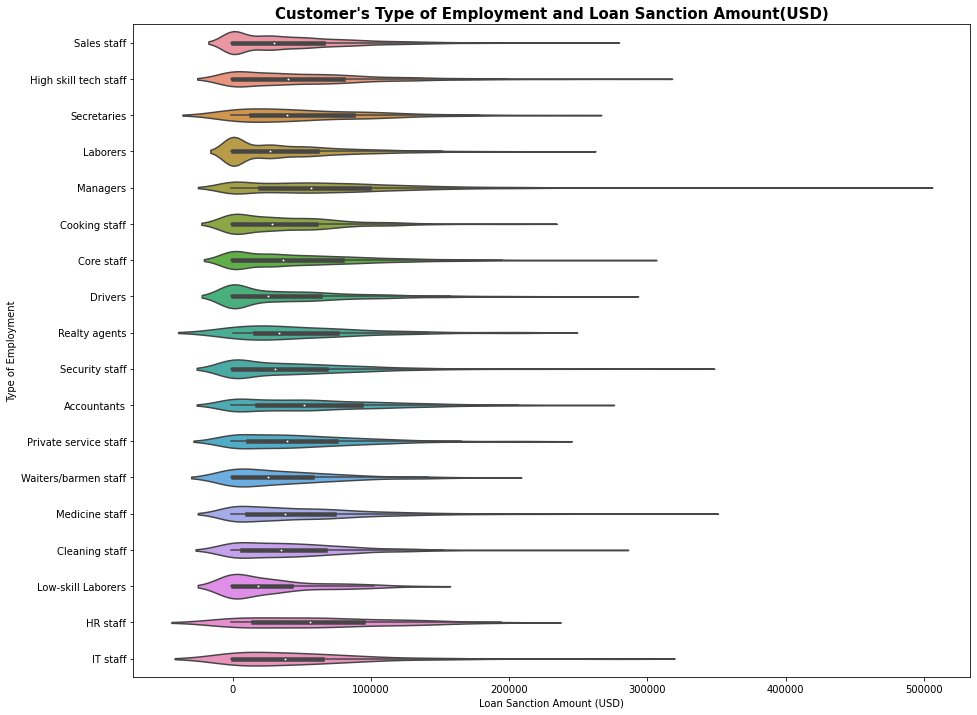

In [ ]:
plt.figure(figsize=(15,12))
emptyp_loan=sns.violinplot(y=train['Type of Employment'],x=train['Loan Sanction Amount (USD)'])
_=emptyp_loan.set_title("Customer's Type of Employment and Loan Sanction Amount(USD)",fontdict={'fontsize':15,'fontweight':'bold'})

In [ ]:
train.groupby('Type of Employment')['Loan Sanction Amount (USD)'].describe()

,count,mean,std,min,25%,50%,75%,max
Type of Employment,,,,,,,,
Accountants,1363.0,60038.833360,53325.436877,-999.0,17277.9650,51139.920,92986.6000,250708.52
Cleaning staff,338.0,43801.487722,41648.418844,-999.0,6548.3075,35188.105,66552.3675,260138.31
Cooking staff,561.0,37815.350713,38697.417962,-999.0,0.0000,28467.070,60263.0400,212633.05
Core staff,3189.0,49958.008812,50081.657274,-999.0,0.0000,36077.350,78649.3000,286627.98
Drivers,1588.0,39365.395913,46992.526843,-999.0,0.0000,25427.705,63033.1075,271793.03
HR staff,71.0,60651.665915,51022.826051,-999.0,14929.2750,56039.010,93947.4250,193792.78
High skill tech staff,1297.0,52152.808921,51989.084124,-999.0,0.0000,39678.780,79490.3600,293150.14
IT staff,77.0,46155.705844,49032.481704,-999.0,0.0000,37396.370,64808.8200,278542.94
Laborers,5516.0,38219.072219,42900.417400,-999.0,0.0000,26749.360,60610.9225,247099.58


#### The above violin plot explains that the customers who are working as a manager, medical staff and security staff will get highest home loan amount compared to other type of employment customers.

#### Let's see is there any relation between the customer's residing location and the home loan sanction amount.

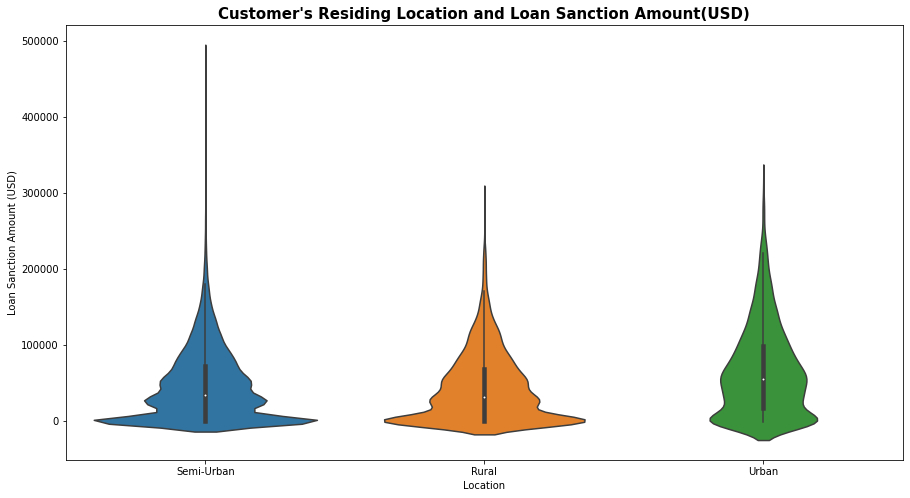

In [ ]:
plt.figure(figsize=(15,8))
loc_loan=sns.violinplot(x=train['Location'],y=train['Loan Sanction Amount (USD)'])
_=loc_loan.set_title("Customer's Residing Location and Loan Sanction Amount(USD)",fontdict={'fontsize':15,'fontweight':'bold'})

In [ ]:
train.groupby('Location')['Loan Sanction Amount (USD)'].describe()

,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
Rural,5280.0,43491.369250,45413.293529,-999.0,0.000,31241.83,68885.1425,293150.14
Semi-Urban,21317.0,46140.487738,46565.408213,-999.0,0.000,33916.69,72182.2200,481907.32
Urban,3063.0,65317.754861,59284.695504,-999.0,17160.315,54750.04,99109.4650,313452.68


#### The violin plot explains that the semi-urban customers received the highest home loan sanctioned amount. 

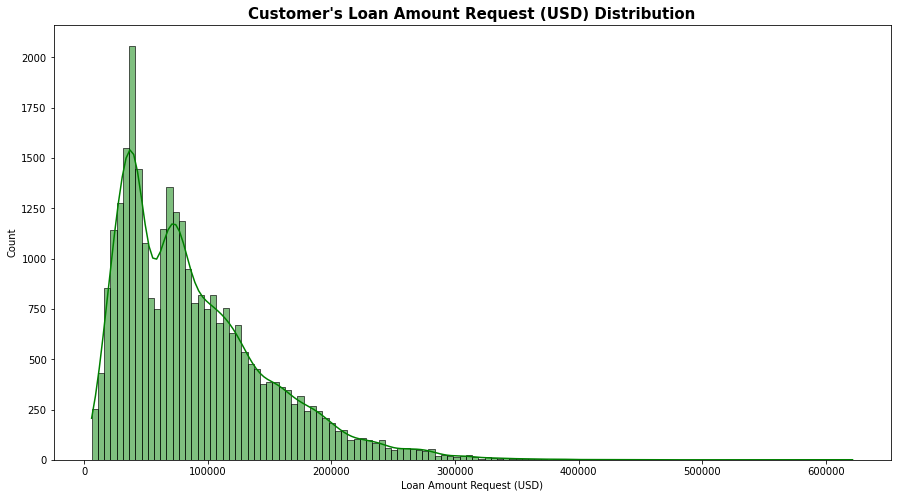

In [ ]:
plt.figure(figsize=(15,8))
loan_req_hist=sns.histplot(train['Loan Amount Request (USD)'],kde=True,bins='auto',color='green')
_= loan_req_hist.set_title("Customer's Loan Amount Request (USD) Distribution",fontdict={'fontsize':15,'fontweight':'bold'})

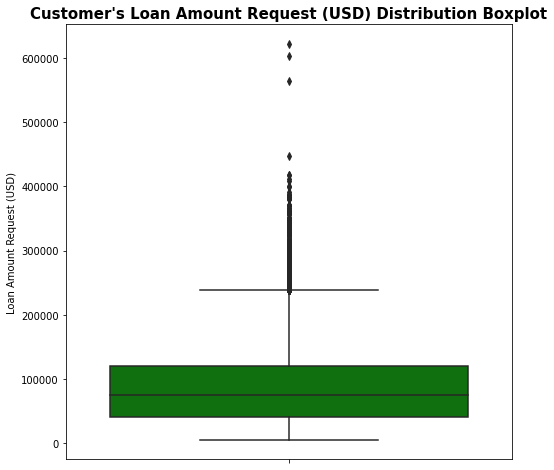

In [ ]:
plt.figure(figsize=(8,8))
loan_req_box=sns.boxplot(y=train['Loan Amount Request (USD)'],color='green',)
_= loan_req_box.set_title("Customer's Loan Amount Request (USD) Distribution Boxplot",fontdict={'fontsize':15,'fontweight':'bold'})

In [ ]:
train['Loan Amount Request (USD)'].describe()

count     30000.000000
mean      88826.333855
std       59536.949605
min        6048.240000
25%       41177.755000
50%       75128.075000
75%      119964.605000
max      621497.820000
Name: Loan Amount Request (USD), dtype: float64

#### The above histogram and boxplot explains that the requested loan amount feature distribution is right skewed.There more outliers above the third quartile.

#### Let's see is there any relation between requested loan amount and sanctioned loan amount.

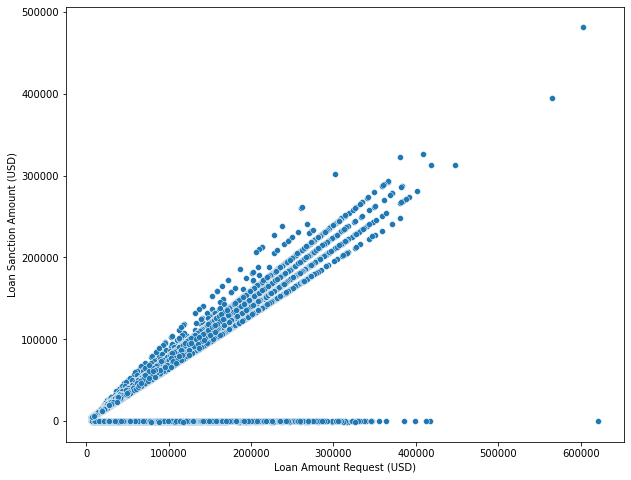

In [ ]:
plt.figure(figsize=(10,8))
loan_req_sanc=sns.scatterplot(train['Loan Amount Request (USD)'],train['Loan Sanction Amount (USD)'],markers=True,ci=None)


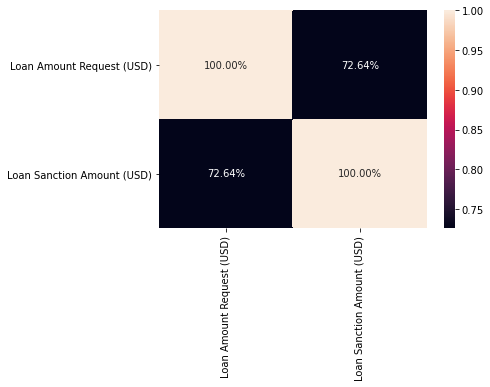

In [ ]:
sns.heatmap(train[['Loan Amount Request (USD)','Loan Sanction Amount (USD)']].corr(),annot=True,fmt=".2%")

#### The above scatter plot and heatmap explains that there is a positive correlation(one variable increase while other variable increases) between requested loan amount and sanctioned loan amount.

### Let's see customer's current loan expenses (USD) distribution

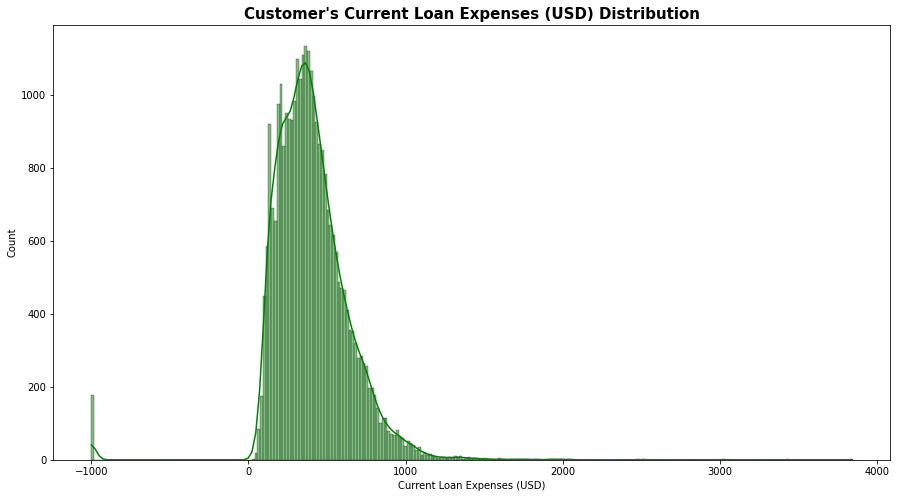

In [ ]:
plt.figure(figsize=(15,8))
cur_loan_ex_hist=sns.histplot(train['Current Loan Expenses (USD)'],kde=True,bins='auto',color='green')
_= cur_loan_ex_hist.set_title("Customer's Current Loan Expenses (USD) Distribution",fontdict={'fontsize':15,'fontweight':'bold'})

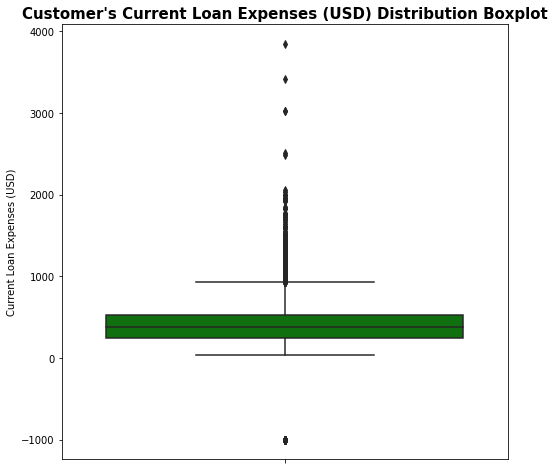

In [ ]:
plt.figure(figsize=(8,8))
cur_loan_ex_box=sns.boxplot(y=train['Current Loan Expenses (USD)'],color='green',)
_= cur_loan_ex_box.set_title("Customer's Current Loan Expenses (USD) Distribution Boxplot",fontdict={'fontsize':15,'fontweight':'bold'})

In [ ]:
train['Current Loan Expenses (USD)'].describe()

count    29828.000000
mean       400.936876
std        242.545375
min       -999.000000
25%        247.667500
50%        375.205000
75%        521.292500
max       3840.880000
Name: Current Loan Expenses (USD), dtype: float64

#### The above histogram and boxplot explains that the customer's current loan expenses feature distribution is normal.There are outliers in the below first quartile and above the third quartiles.

#### The average customer's current loan expanses is 400 USD.

### Let's see will the new home loan sanction amount based on the current loans?

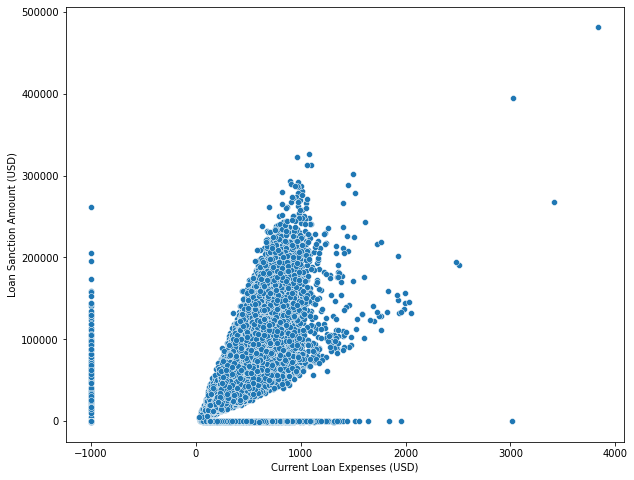

In [ ]:
plt.figure(figsize=(10,8))
cur_loan_ex=sns.scatterplot(train['Current Loan Expenses (USD)'],train['Loan Sanction Amount (USD)'],markers=True,ci=None)


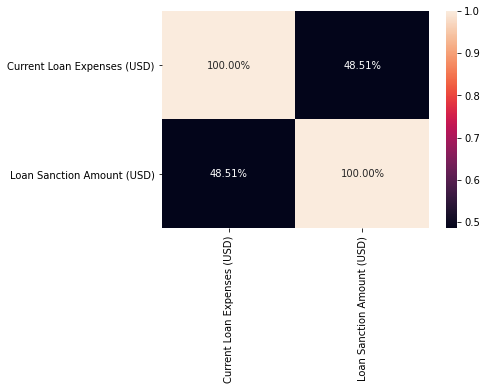

In [ ]:
_=sns.heatmap(train[['Current Loan Expenses (USD)','Loan Sanction Amount (USD)']].corr(),annot=True,fmt=".2%")

#### The above scatter plot and heatmap explains that there is a positive correlation between customer current loan expenses and loan sanction amount.

#### Let's see customer's type 1 expenses categories and loan sanction amount.

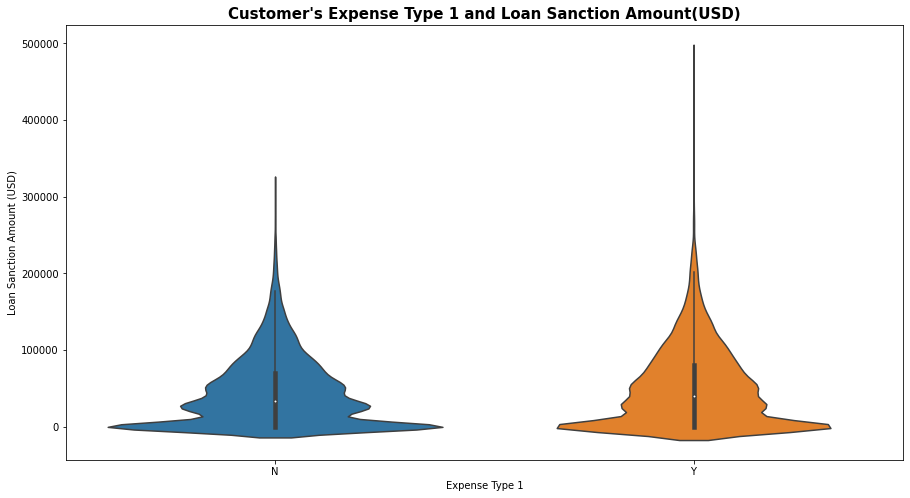

In [ ]:
plt.figure(figsize=(15,8))
exp1_loan=sns.violinplot(x=train['Expense Type 1'],y=train['Loan Sanction Amount (USD)'])
_=exp1_loan.set_title("Customer's Expense Type 1 and Loan Sanction Amount(USD)",fontdict={'fontsize':15,'fontweight':'bold'})

In [ ]:
train.groupby('Expense Type 1')['Loan Sanction Amount (USD)'].describe()

,count,mean,std,min,25%,50%,75%,max
Expense Type 1,,,,,,,,
N,18984.0,45644.925558,45942.355448,-999.0,0.0,33516.22,70691.0300,313502.39
Y,10676.0,51213.584031,51838.456700,-999.0,0.0,39785.28,81054.9075,481907.32


#### The above violin plot explains that the customers who are spending money on type 1 expenses are likely to get a high home loan sanction amount.

### Let's see customer's type 2 expenses categories and loan sanction amount.

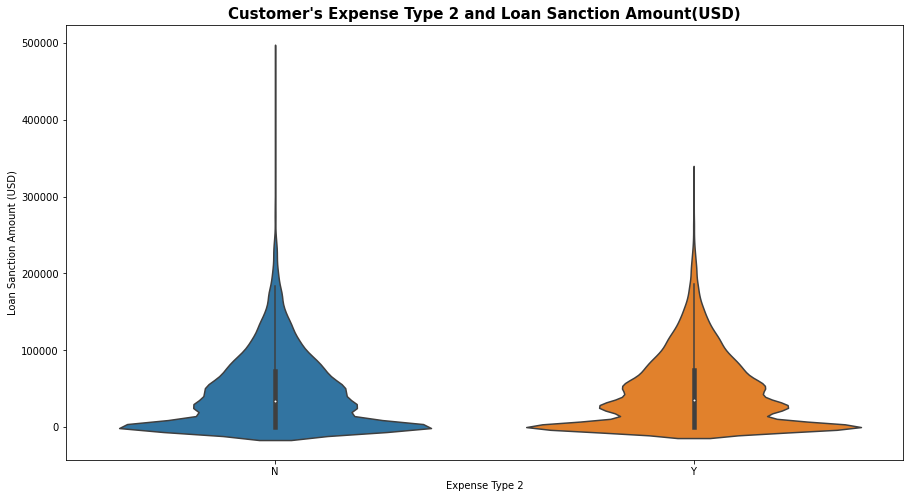

In [ ]:
plt.figure(figsize=(15,8))
exp2_loan=sns.violinplot(x=train['Expense Type 2'],y=train['Loan Sanction Amount (USD)'])
_=exp2_loan.set_title("Customer's Expense Type 2 and Loan Sanction Amount(USD)",fontdict={'fontsize':15,'fontweight':'bold'})

In [ ]:
train.groupby('Expense Type 2')['Loan Sanction Amount (USD)'].describe()

,count,mean,std,min,25%,50%,75%,max
Expense Type 2,,,,,,,,
N,9711.0,47047.205849,49310.616307,-999.0,0.0,34562.35,73655.445,481907.32
Y,19949.0,47942.456960,47680.294087,-999.0,0.0,35566.70,74508.240,326730.56


#### In contrast to the above type 1, customers who are not spending money on type 2 expenses are likely to get a high home loan sanction amount.

### Let's see is there any relation between the customer's family members count and loan sanction amount.

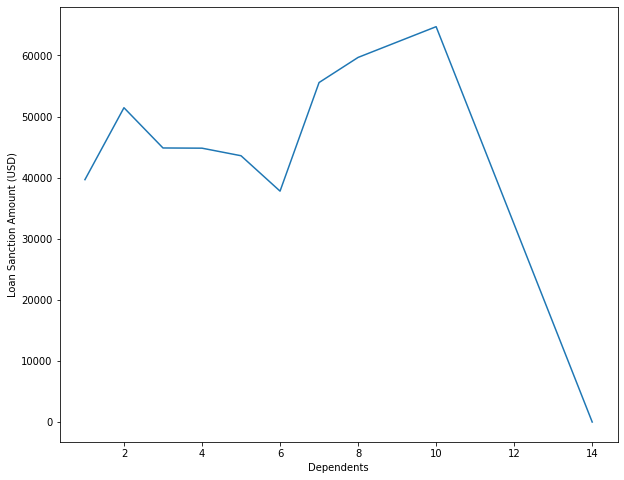

In [ ]:
plt.figure(figsize=(10,8))
depen_loan=sns.lineplot(train['Dependents'],train['Loan Sanction Amount (USD)'],markers=True,ci=None)

In [ ]:
train.groupby('Dependents')['Loan Sanction Amount (USD)'].describe()

,count,mean,std,min,25%,50%,75%,max
Dependents,,,,,,,,
1.0,5488.0,39667.606463,43526.783143,-999.00,0.00,28028.750,62046.6325,313502.39
2.0,12963.0,51439.503039,50523.778431,-999.00,0.00,40604.000,80464.4550,326730.56
3.0,5653.0,44853.939036,47082.259419,-999.00,0.00,31781.780,71010.2300,293150.14
4.0,2680.0,44819.674948,45671.356887,-999.00,0.00,33394.655,71422.6200,481907.32
5.0,370.0,43582.410486,45702.716486,-999.00,0.00,33504.935,71727.7150,251531.18
6.0,50.0,37790.218200,38505.646608,-999.00,0.00,31396.115,53615.3850,146283.64
7.0,7.0,55562.931429,67247.256603,0.00,6606.67,27033.940,96055.9600,156581.32
8.0,1.0,59673.890000,NaN,59673.89,59673.89,59673.890,59673.8900,59673.89
10.0,1.0,64702.790000,NaN,64702.79,64702.79,64702.790,64702.7900,64702.79


#### The above line plot explains that the customers who have 14 members in their families will not get a home loan.

#### customers who have 2,7,8, and 10 members in their families will get the maximum sanctioned home loan amount.

### Let's see customer's credit score distribution

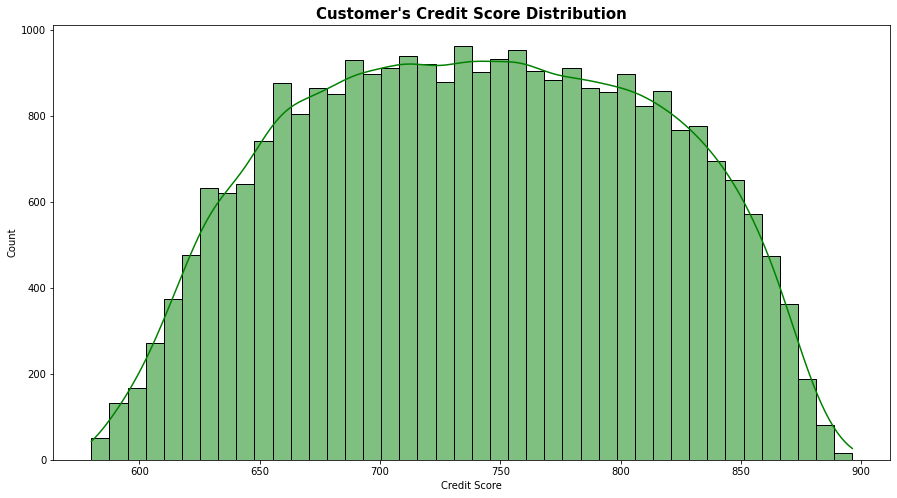

In [ ]:
plt.figure(figsize=(15,8))
cscor_loan_hist=sns.histplot(train['Credit Score'],kde=True,bins='auto',color='green')
_= cscor_loan_hist.set_title("Customer's Credit Score Distribution",fontdict={'fontsize':15,'fontweight':'bold'})

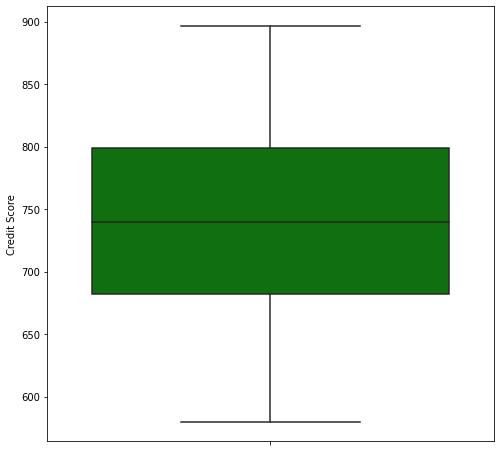

In [ ]:
plt.figure(figsize=(8,8))
cscor_loan_box=sns.boxplot(y=train['Credit Score'],color='green')
_= propric_loan_box.set_title("Customer's Credit Score Distribution Boxplot",fontdict={'fontsize':15,'fontweight':'bold'})

In [ ]:
train['Credit Score'].describe()

count    28297.000000
mean       739.885381
std         72.163846
min        580.000000
25%        681.880000
50%        739.820000
75%        799.120000
max        896.260000
Name: Credit Score, dtype: float64

#### The above histogram and boxplot explains that the credit score feature distribution is normal and boxplot explains there is no outliers.

#### The average customer's credit score is 739

### Let's see will be the customer's home loan sanction amount depend on the customer's credit score?

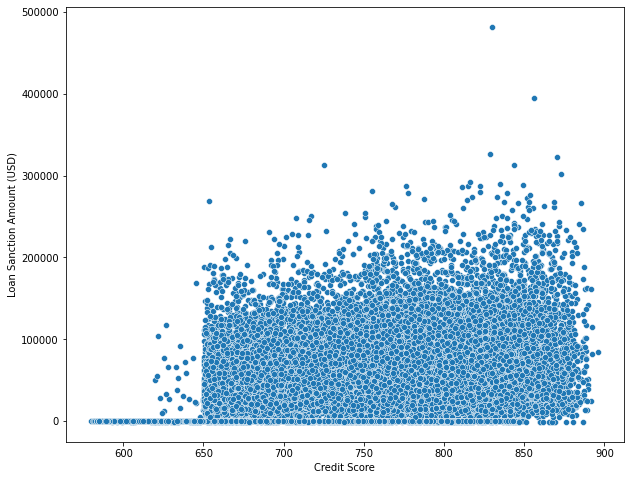

In [ ]:
plt.figure(figsize=(10,8))
crscr_loan=sns.scatterplot(train['Credit Score'],train['Loan Sanction Amount (USD)'],markers=True,ci=None)


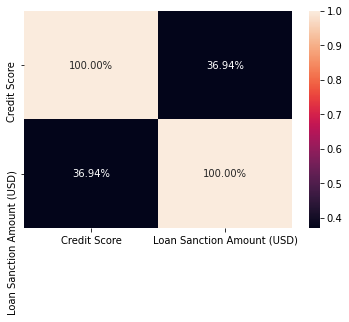

In [ ]:
sns.heatmap(train[['Credit Score','Loan Sanction Amount (USD)']].dropna().corr(),annot=True,fmt=".2%")

#### The above scatter plot explains that there is a correlation between the customer's credit score and the home loan sanction amount but can't conclude highest credit score customer will get the highest home loan sanction amount.

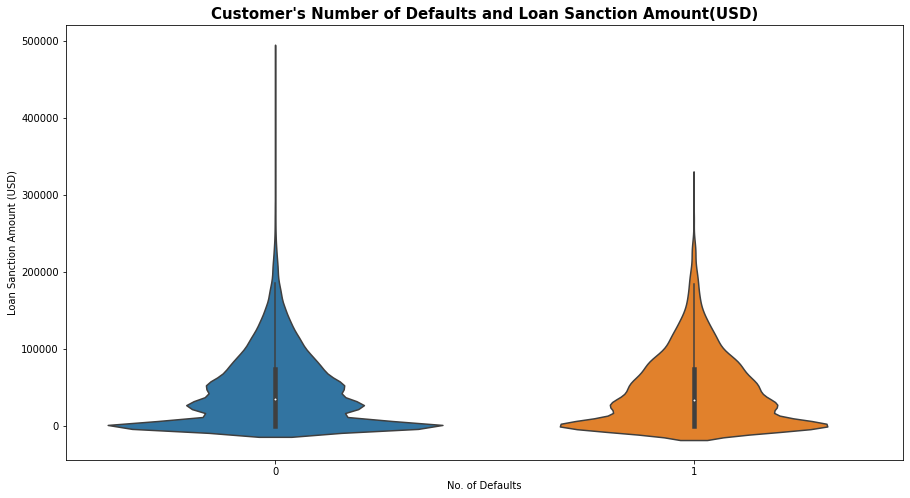

In [ ]:
plt.figure(figsize=(15,8))
defau_loan=sns.violinplot(x=train['No. of Defaults'],y=train['Loan Sanction Amount (USD)'])
_=defau_loan.set_title("Customer's Number of Defaults and Loan Sanction Amount(USD)",fontdict={'fontsize':15,'fontweight':'bold'})

In [ ]:
train.groupby('No. of Defaults')['Loan Sanction Amount (USD)'].describe()

,count,mean,std,min,25%,50%,75%,max
No. of Defaults,,,,,,,,
0,23904.0,47751.794752,48261.643564,-999.0,0.0,35387.220,74334.5075,481907.32
1,5756.0,47223.868683,48054.446943,-999.0,0.0,34371.045,73917.1100,313452.68


#### The above violin plot explains that there is no difference between the non-dues and home loan sanction amounts. so it says, a single non-payment will not affect the home loan sanction amount.

#### Let's see is there any change in the home loan sanction amount of a customer who has an active credit card.

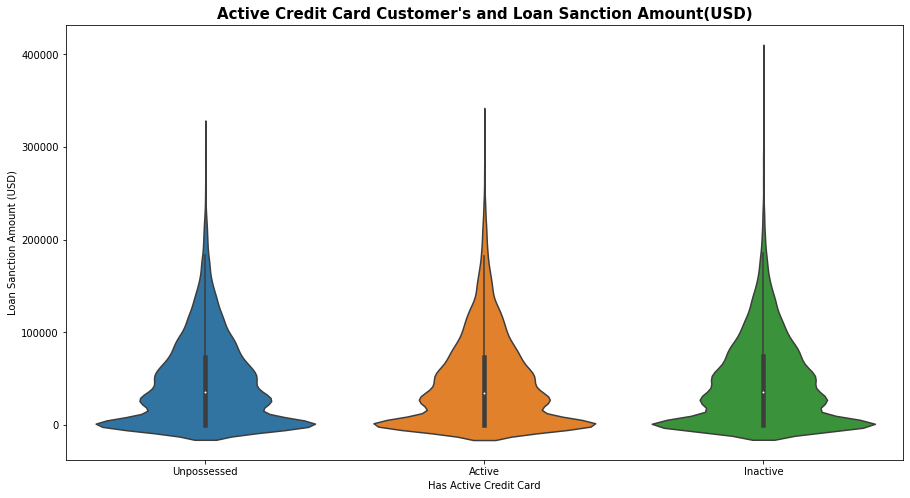

In [ ]:
plt.figure(figsize=(15,8))
ccard_loan=sns.violinplot(x=train['Has Active Credit Card'],y=train['Loan Sanction Amount (USD)'])
_=ccard_loan.set_title("Active Credit Card Customer's and Loan Sanction Amount(USD)",fontdict={'fontsize':15,'fontweight':'bold'})

In [ ]:
train.groupby('Has Active Credit Card')['Loan Sanction Amount (USD)'].describe()

,count,mean,std,min,25%,50%,75%,max
Has Active Credit Card,,,,,,,,
Active,9668.0,47141.652139,48242.819596,-999.0,0.0,34110.105,73172.3675,326730.56
Inactive,9360.0,47030.441630,47000.848904,-999.0,0.0,35373.935,74110.0975,395368.74
Unpossessed,9086.0,47071.961744,46816.728335,-999.0,0.0,34988.360,73401.7150,313502.39


#### The above violin plot explains that customers who are having active credit will not affect the home loan sanction amount.

### Let's see property age and home loan sanction amount.

#### The property age has given in day format lets convert it into year format.

In [ ]:
train['property_age_year']=train['Property Age']/365

#### There is one property that has 4000 and above year old. It could be a data entry error. So Filter out the extreme property age value.

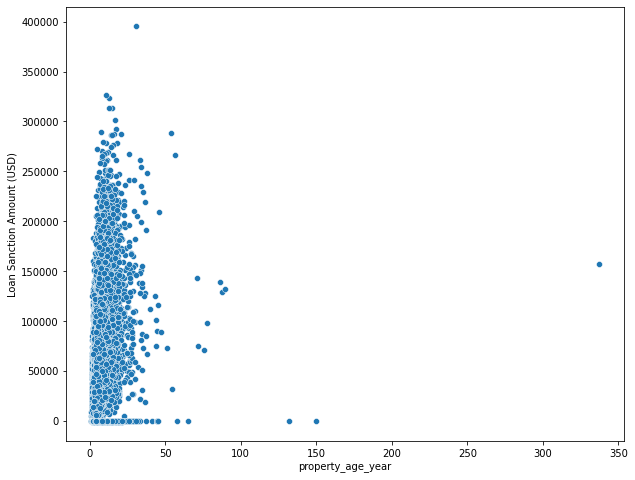

In [ ]:
plt.figure(figsize=(10,8))
_=sns.scatterplot(train[train['property_age_year']<4000]['property_age_year'],train['Loan Sanction Amount (USD)'])

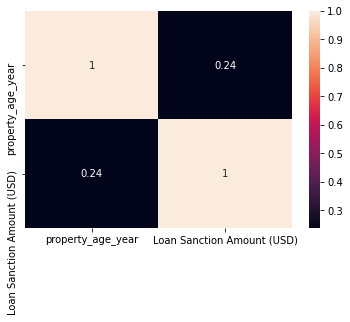

In [ ]:
_=sns.heatmap(train[train['property_age_year']<4000][['property_age_year','Loan Sanction Amount (USD)']].corr(),annot=True)

#### The above scatter plot and heatmap explain that there is no notable correlation between the property age and the loan sanction amount.

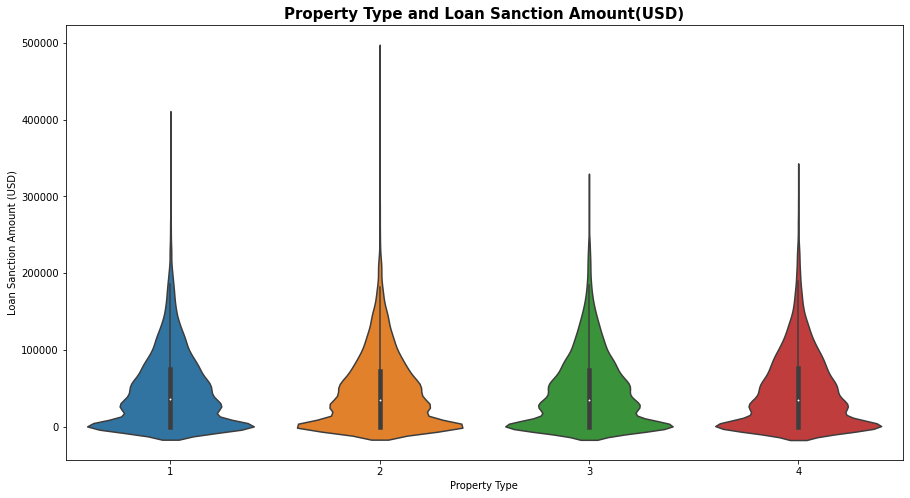

In [ ]:
plt.figure(figsize=(15,8))
proptyp_loan=sns.violinplot(x=train['Property Type'],y=train['Loan Sanction Amount (USD)'])
_=proptyp_loan.set_title("Property Type and Loan Sanction Amount(USD)",fontdict={'fontsize':15,'fontweight':'bold'})

In [ ]:
train.groupby('Property Type')['Loan Sanction Amount (USD)'].describe()

,count,mean,std,min,25%,50%,75%,max
Property Type,,,,,,,,
1,7777.0,47910.175844,48246.642587,-999.0,0.0,35820.90,74627.9900,395368.74
2,7560.0,47087.190250,47842.054955,-999.0,0.0,34896.18,72777.0575,481907.32
3,7225.0,47544.089907,48086.555927,-999.0,0.0,34702.05,73799.0400,313502.39
4,7098.0,48069.434276,48733.454708,-999.0,0.0,35199.54,75785.4075,326730.56


#### The above violin plot explains that there is no big difference in loan sanction amount and property types.

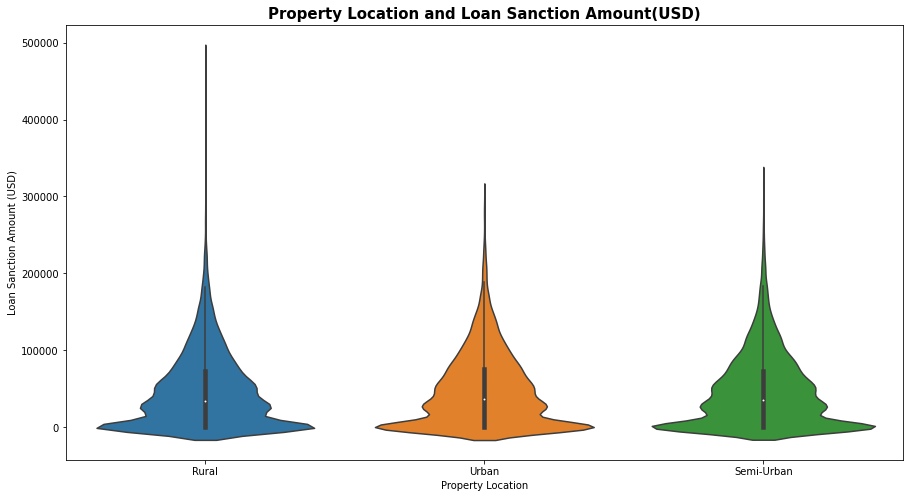

In [ ]:
plt.figure(figsize=(15,8))
proploc_loan=sns.violinplot(x=train['Property Location'],y=train['Loan Sanction Amount (USD)'])
_=proploc_loan.set_title("Property Location and Loan Sanction Amount(USD)",fontdict={'fontsize':15,'fontweight':'bold'})

In [ ]:
train.groupby('Property Location')['Loan Sanction Amount (USD)'].describe()

,count,mean,std,min,25%,50%,75%,max
Property Location,,,,,,,,
Rural,9929.0,47249.940879,48360.114664,-999.0,0.0,34408.43,72902.74,481907.32
Semi-Urban,10255.0,47324.631632,48098.470966,-999.0,0.0,35073.04,73761.77,323233.31
Urban,9129.0,48124.183177,48259.759122,-999.0,0.0,36121.24,75961.02,301457.20


#### The above violin plot explains that there is no big difference in loan sanction amount and location of the property.

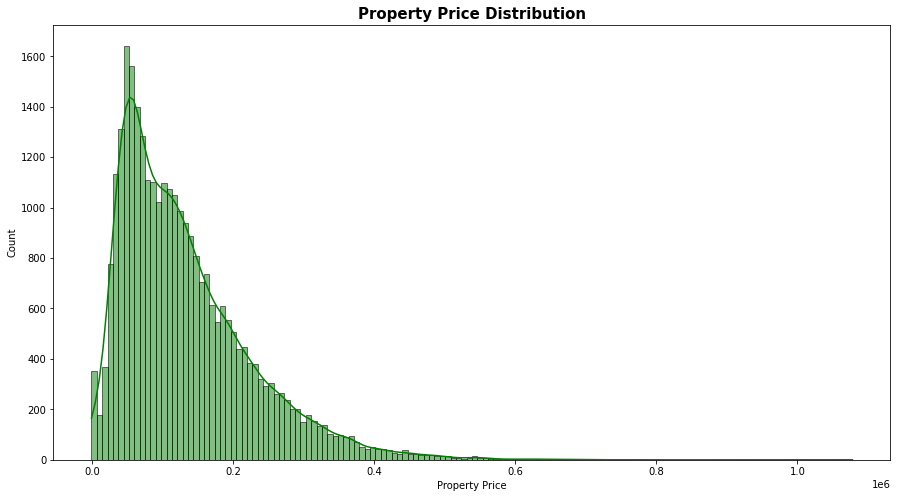

In [ ]:
plt.figure(figsize=(15,8))
propric_loan_hist=sns.histplot(train['Property Price'],kde=True,bins='auto',color='green')
_= propric_loan_hist.set_title("Property Price Distribution",fontdict={'fontsize':15,'fontweight':'bold'})

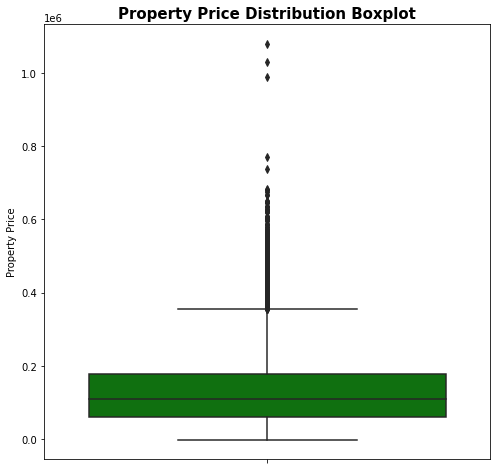

In [ ]:
plt.figure(figsize=(8,8))
propric_loan_box=sns.boxplot(y=train['Property Price'],color='green')
_= propric_loan_box.set_title("Property Price Distribution Boxplot",fontdict={'fontsize':15,'fontweight':'bold'})

In [ ]:
train['Property Price'].describe()

count    3.000000e+04
mean     1.317597e+05
std      9.354955e+04
min     -9.990000e+02
25%      6.057216e+04
50%      1.099936e+05
75%      1.788807e+05
max      1.077967e+06
Name: Property Price, dtype: float64

#### The above histogram and boxplot explain that the property distribution is right-skewed and the boxplot explains there are more outliers above the third quartile.

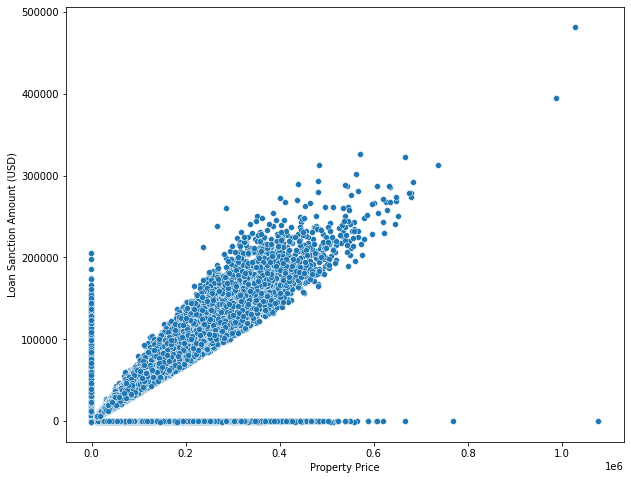

In [ ]:
plt.figure(figsize=(10,8))
_=sns.scatterplot(train['Property Price'],train['Loan Sanction Amount (USD)'])

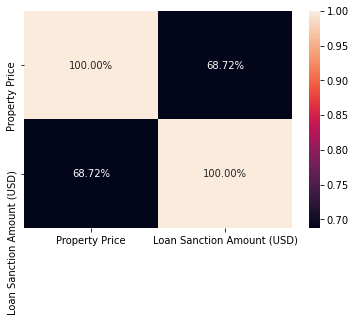

In [ ]:
_=sns.heatmap(train[['Property Price','Loan Sanction Amount (USD)']].corr(),annot=True,fmt=".2%")

#### The above scatter plot and heatmap explain that there is a high positive correlation between the property price and loan sanction amount.

### Let's see income stability types with customer income distribution.

<Figure size 720x576 with 0 Axes>

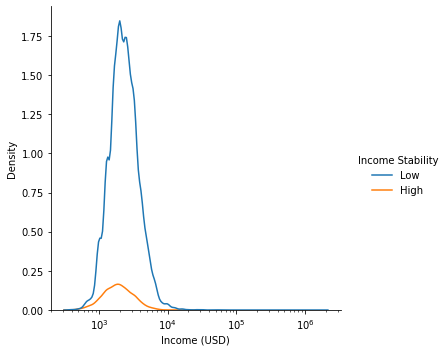

In [ ]:
plt.figure(figsize=(10,8))
insta_incom=sns.displot(hue=train['Income Stability'],x=train['Income (USD)'],kind="kde",log_scale=True,)

In [ ]:
train.groupby('Income Stability')['Income (USD)'].describe()

,count,mean,std,min,25%,50%,75%,max
Income Stability,,,,,,,,
High,2171.0,2149.223754,1212.695856,424.45,1341.285,1894.65,2661.205,23767.31
Low,22013.0,2687.928911,12093.423118,377.70,1677.260,2264.56,3126.510,1777460.21


#### The above density plot there is a difference in customer income and type of income stability.

#### The above group by summary shows that there is an extreme income value in the low stability income category.

#### Let's sort the customer income data in descending order and see how many extreme value values are there.

In [ ]:
train['Income (USD)'].sort_values(ascending=False)

20965    1777460.21
6719      122966.28
26619      54653.75
15991      48095.16
29585      32726.98
            ...    
29978           NaN
29980           NaN
29991           NaN
29993           NaN
29997           NaN
Name: Income (USD), Length: 30000, dtype: float64

#### The above information shows that there is only one extreme value.

### Let's see that row which has an extreme value

In [ ]:
train[train['Income (USD)']>1777460]


fe

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
20965,C-40922,Joaquin Beckmann,M,29,1777460.21,Low,Working,Laborers,Semi-Urban,87735.85,390.93,N,Y,3.0,730.61,0,Inactive,129,1777460.21,4,Semi-Urban,1,164053.95,61415.1


#### The above table shows that there is an data entry error in above row.

#### Income and property age column have the same value.

#### Let's see which type of profession comes under the stability income category

<Figure size 720x576 with 0 Axes>

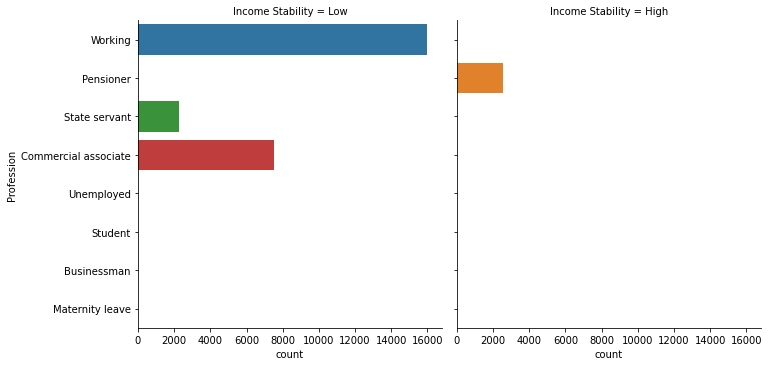

In [ ]:
plt.figure(figsize=(10,8))
_=sns.catplot(data=train, y="Profession", col="Income Stability",kind='count',col_wrap=3)

#### Stability income category customers are pensioners.

### Let's see customer's profession-wise income distribution

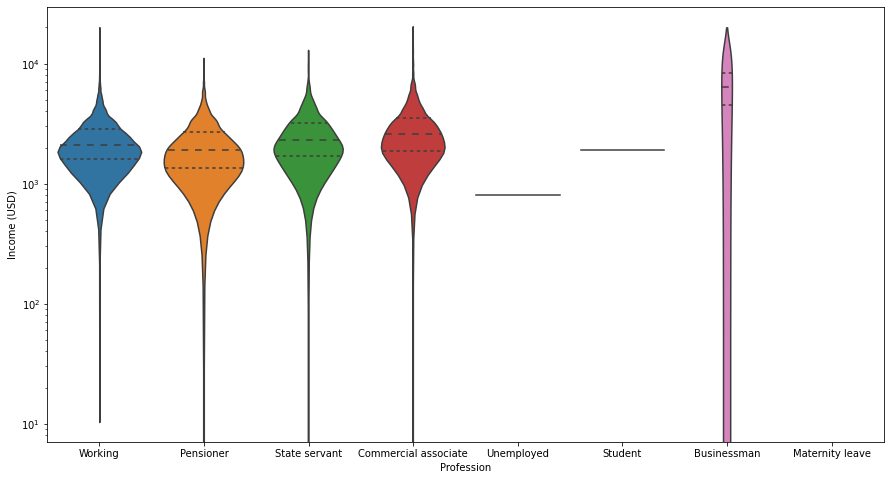

In [ ]:
plt.figure(figsize=(15,8))
prof_incom=sns.violinplot(x=train['Profession'],y=train[train['Income (USD)']<20000]['Income (USD)'],split=True, inner="quart")
prof_incom.set_yscale('log')

In [ ]:
train[train['Income (USD)']<20000].groupby('Profession')['Income (USD)'].describe()

,count,mean,std,min,25%,50%,75%,max
Profession,,,,,,,,
Businessman,2.0,6425.990000,5479.115889,2551.67,4488.830,6425.990,8363.15,10300.31
Commercial associate,6720.0,2962.573897,1659.581379,505.20,1886.830,2576.345,3508.79,19726.92
Pensioner,2301.0,2143.600782,1124.477989,393.09,1341.200,1901.000,2667.41,10579.38
State servant,2017.0,2617.009028,1351.877566,418.90,1700.860,2312.320,3203.00,12299.88
Student,1.0,1914.580000,NaN,1914.58,1914.580,1914.580,1914.58,1914.58
Unemployed,1.0,805.370000,NaN,805.37,805.370,805.370,805.37,805.37
Working,14368.0,2399.221477,1246.077983,377.70,1606.675,2114.745,2879.27,19768.89


#### The above violin plot explains that commercial associates and working professional customers are earning maximum income compare to the rest of the profession.

### Let's see the correlation between independent numeric variables and target variable

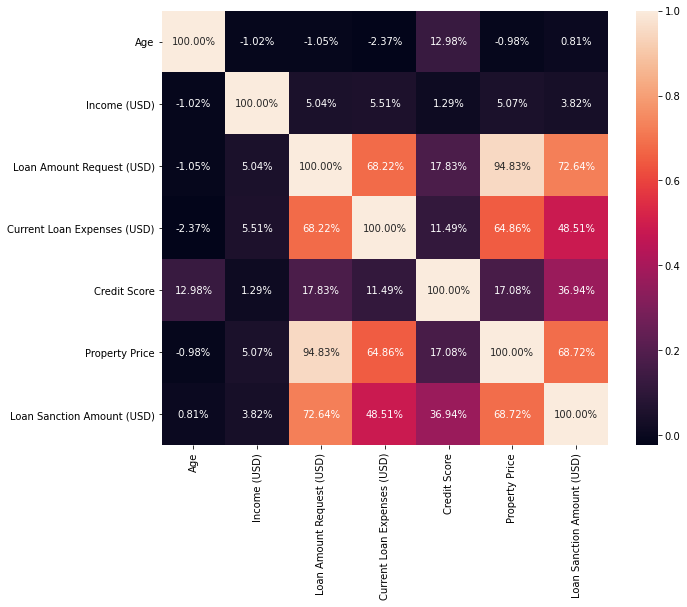

In [ ]:
plt.figure(figsize=(10,8))
_=sns.heatmap(train.iloc[:,np.r_[3,4,9,10,14,22,23]].corr(),annot=True,fmt=".2%")


#### There is a high positive correlation between current loan expenses and property price.

#### high positive correlation between requested loan amount and current loan expenses.

#### Negative correlation between age and property price,current loan expenses,requested loan amount and income.

####  There is a 72% positive high correlation between the loan sanction amount and the requested loan amount. Moreover, Property price has a high positive correlation with the loan sanction amount.

### Missing values visualization

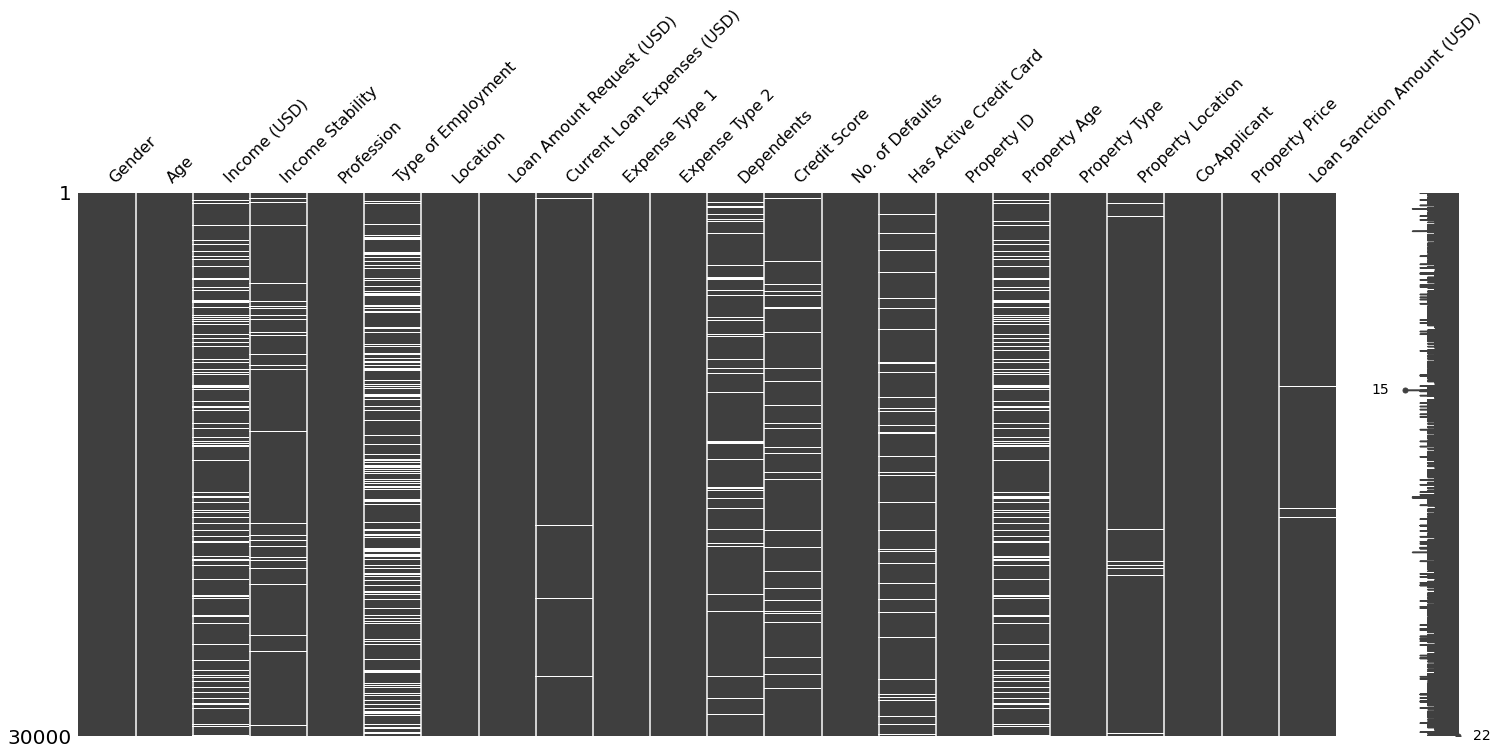

In [ ]:
msno.matrix(train.iloc[:,2:24])

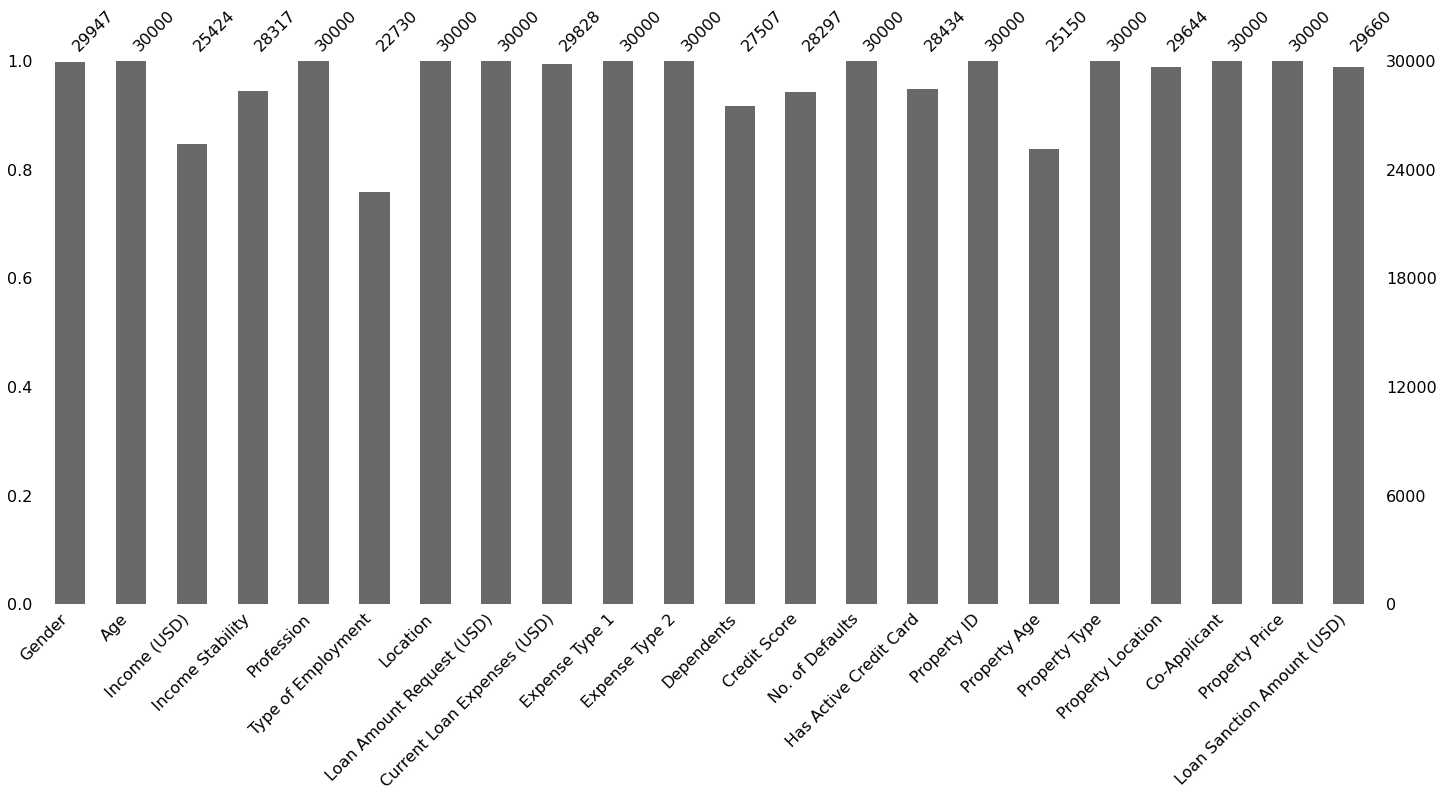

In [ ]:
msno.bar(train.iloc[:,2:24])

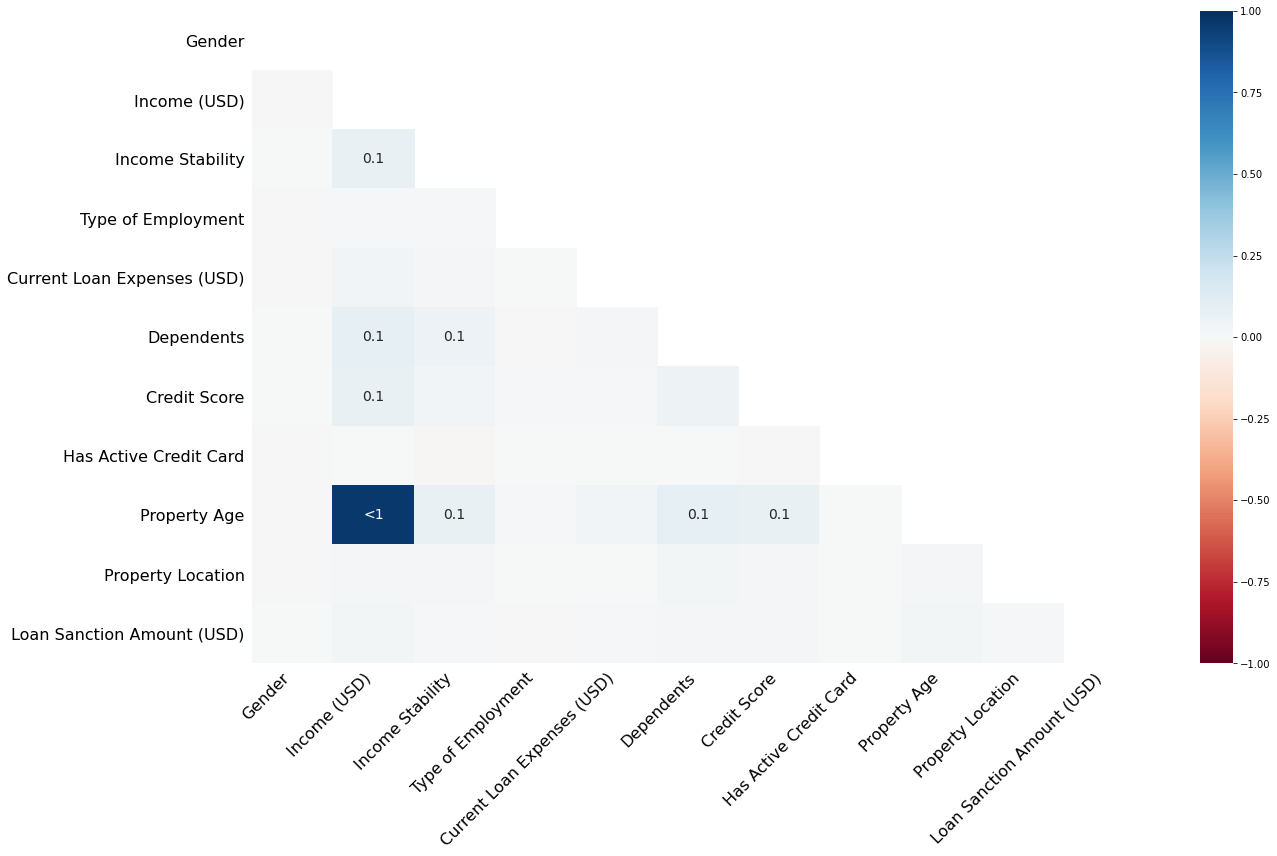

In [ ]:
msno.heatmap(train.iloc[:,2:24])

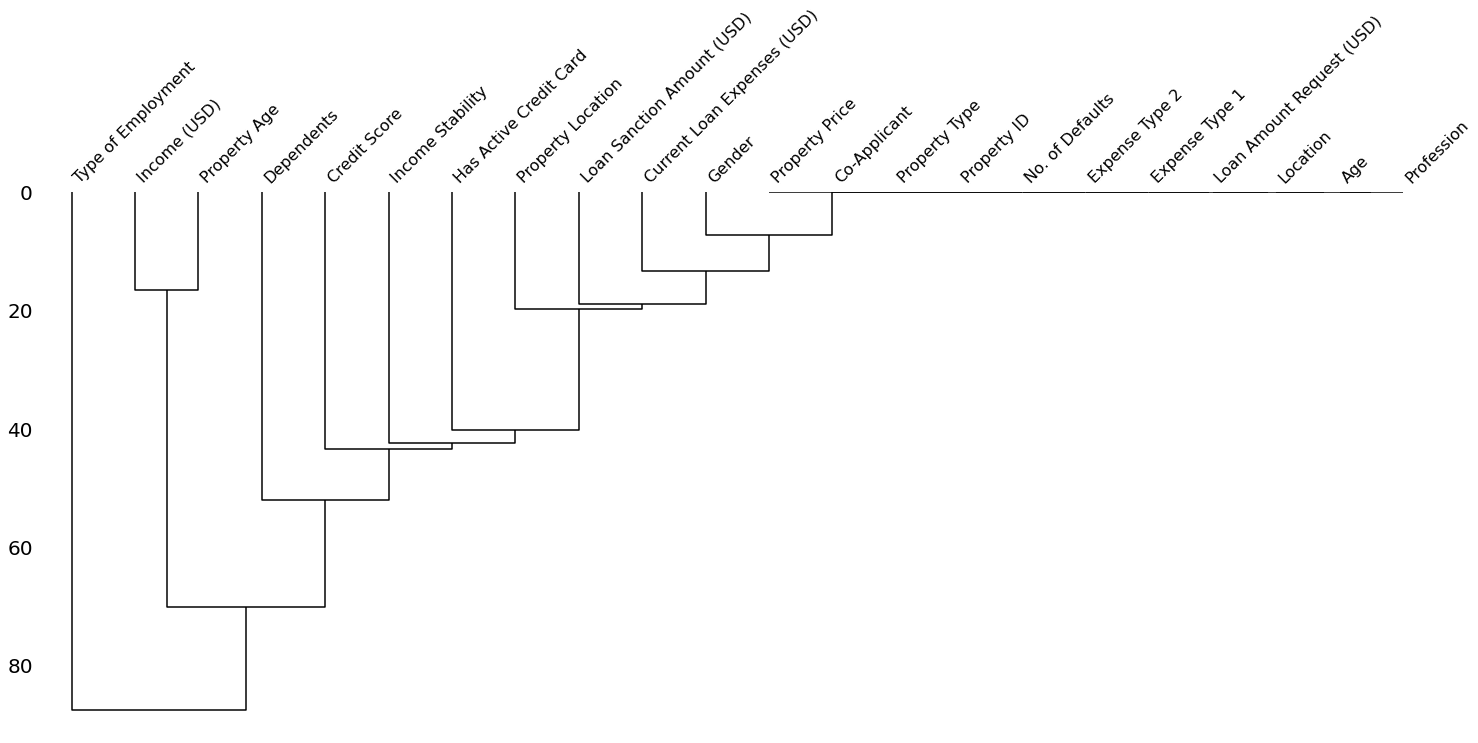

In [ ]:
msno.dendrogram(train.iloc[:,2:24])